# Tarea 2. Midiendo rendimiento y riesgo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.maxpixel.net/static/photo/1x/Wall-Street-Dices-Over-Newspaper-Profit-Loss-Risk-2656028.jpg" width="600px" height="400px" />

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea3_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea3_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), y para 15 compañías que compongan dicho índice, durante el periodo comprendido del primero de enero del 2015 hasta el día en que realicen la tarea.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).

In [2]:
tickers = ['JNJ', 'PG', 'MA', 'HD', 'COST',
           'MRK', 'ABBV', 'ADBE', 'CRM', 'AMD',
           'CVX', 'NFLX', 'BAC', 'WMT', 'PEP',
           '^GSPC']
start_date = '2015-01-01'
end_date = '2024-02-01'
df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  16 of 16 completed


In [3]:
df

Ticker,ABBV,ADBE,AMD,BAC,COST,CRM,CVX,HD,JNJ,MA,MRK,NFLX,PEP,PG,WMT,^GSPC
Date,,,,,,,,,,,,,,,,
2015-01-02,44.728275,72.339996,2.670000,14.902426,115.232285,59.240002,76.629166,83.899818,81.822159,80.904427,41.324867,49.848572,72.858086,69.536346,71.167412,2058.199951
2015-01-05,43.886539,71.980003,2.660000,14.469508,113.922134,58.169998,73.566170,82.139587,81.250679,78.628777,41.939072,47.311428,72.310341,69.205750,70.960266,2020.579956
2015-01-06,43.669304,70.529999,2.630000,14.036589,115.427559,57.200001,73.532135,81.888092,80.851418,78.458763,43.586567,46.501431,71.762581,68.890495,71.507072,2002.609985
2015-01-07,45.434273,71.110001,2.580000,14.103192,117.437469,56.930000,73.470863,84.694794,82.636292,79.679237,44.518734,46.742859,73.861015,69.251892,73.404320,2025.900024
2015-01-08,45.909466,72.919998,2.610000,14.394580,118.446495,58.590000,75.152145,86.568596,83.286034,80.918633,45.414722,47.779999,75.203369,70.043808,74.953621,2062.139893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,165.130005,622.580017,180.330002,33.389999,678.902039,279.029999,148.570007,350.970001,159.559998,436.799988,120.129997,562.000000,166.559998,155.619995,162.839996,4894.160156
2024-01-26,164.399994,613.929993,177.250000,33.430000,685.871765,279.940002,149.139999,355.299988,159.500000,438.529999,120.820000,570.419983,167.860001,156.139999,164.270004,4890.970215
2024-01-29,163.910004,630.229980,177.830002,33.610001,692.991272,287.859985,149.080002,355.700012,159.360001,440.579987,121.279999,575.789978,168.149994,156.160004,165.039993,4927.930176


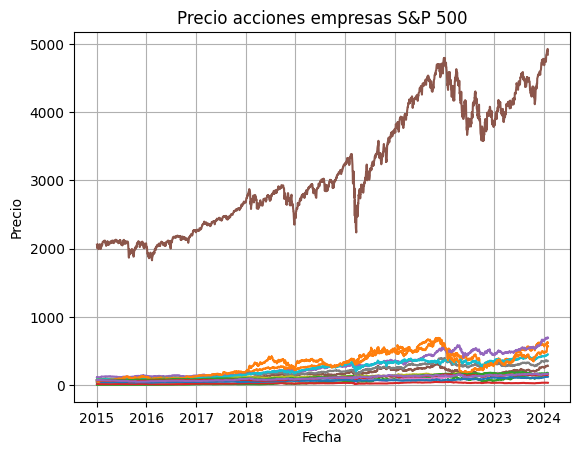

In [4]:
plt.figure()
plt.plot(df)
plt.title("Precio acciones empresas S&P 500")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.grid()

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [5]:
rt = df.pct_change().dropna()
rt

Ticker,ABBV,ADBE,AMD,BAC,COST,CRM,CVX,HD,JNJ,MA,MRK,NFLX,PEP,PG,WMT,^GSPC
Date,,,,,,,,,,,,,,,,
2015-01-05,-0.018819,-0.004976,-0.003745,-0.029050,-0.011370,-0.018062,-0.039972,-0.020980,-0.006984,-0.028128,0.014863,-0.050897,-0.007518,-0.004754,-0.002911,-0.018278
2015-01-06,-0.004950,-0.020145,-0.011278,-0.029919,0.013215,-0.016675,-0.000463,-0.003062,-0.004914,-0.002162,0.039283,-0.017121,-0.007575,-0.004555,0.007706,-0.008893
2015-01-07,0.040417,0.008223,-0.019011,0.004745,0.017413,-0.004720,-0.000833,0.034275,0.022076,0.015556,0.021387,0.005192,0.029241,0.005246,0.026532,0.011630
2015-01-08,0.010459,0.025453,0.011628,0.020661,0.008592,0.029159,0.022884,0.022124,0.007863,0.015555,0.020126,0.022188,0.018174,0.011435,0.021106,0.017888
2015-01-09,-0.027355,-0.014811,0.007663,-0.017929,-0.015389,-0.007339,-0.019926,-0.017148,-0.013629,-0.012744,-0.004614,-0.015458,-0.006771,-0.009330,-0.012380,-0.008404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,0.005541,0.026547,0.011442,0.012432,-0.009628,0.007765,0.025186,0.010655,0.003774,-0.004331,0.010515,0.031439,0.005797,0.023008,0.014579,0.005260
2024-01-26,-0.004421,-0.013894,-0.017080,0.001198,0.010266,0.003261,0.003837,0.012337,-0.000376,0.003961,0.005744,0.014982,0.007805,0.003342,0.008782,-0.000652
2024-01-29,-0.002980,0.026550,0.003272,0.005384,0.010380,0.028292,-0.000402,0.001126,-0.000878,0.004675,0.003807,0.009414,0.001728,0.000128,0.004687,0.007557


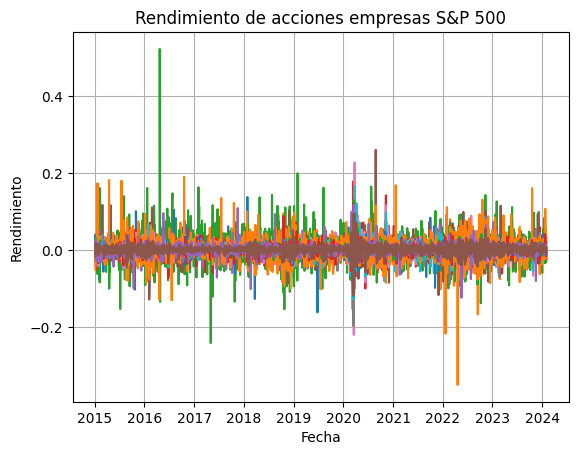

In [6]:
plt.figure()
plt.plot(rt)
plt.title("Rendimiento de acciones empresas S&P 500")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento")
plt.grid()

## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos).

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [7]:
rendimiento_diario = rt.mean()
rendimiento_diario

Ticker
ABBV     0.000715
ADBE     0.001153
AMD      0.002504
BAC      0.000562
COST     0.000881
CRM      0.000920
CVX      0.000472
HD       0.000752
JNJ      0.000357
MA       0.000901
MRK      0.000562
NFLX     0.001469
PEP      0.000438
PG       0.000427
WMT      0.000460
^GSPC    0.000441
dtype: float64

In [8]:
rendimiento_anual = rendimiento_diario * 252
rendimiento_anual

Ticker
ABBV     0.180076
ADBE     0.290431
AMD      0.630947
BAC      0.141636
COST     0.221963
CRM      0.231815
CVX      0.118871
HD       0.189444
JNJ      0.090010
MA       0.227011
MRK      0.141693
NFLX     0.370124
PEP      0.110303
PG       0.107650
WMT      0.115850
^GSPC    0.111231
dtype: float64

In [9]:
volatilidad_diaria = rt.std()
volatilidad_diaria

Ticker
ABBV     0.016932
ADBE     0.020601
AMD      0.037601
BAC      0.020061
COST     0.013732
CRM      0.021892
CVX      0.019182
HD       0.015568
JNJ      0.011527
MA       0.017346
MRK      0.013617
NFLX     0.028293
PEP      0.011859
PG       0.011857
WMT      0.013477
^GSPC    0.011503
dtype: float64

In [10]:
volatilidad_anual = volatilidad_diaria * 252**(1/2)
volatilidad_anual

Ticker
ABBV     0.268794
ADBE     0.327029
AMD      0.596904
BAC      0.318464
COST     0.217989
CRM      0.347525
CVX      0.304512
HD       0.247129
JNJ      0.182992
MA       0.275354
MRK      0.216156
NFLX     0.449135
PEP      0.188252
PG       0.188223
WMT      0.213935
^GSPC    0.182597
dtype: float64

## 4. Gráfico rendimientos esperados vs. volatilidad (40 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (específicamente acerca de $\beta_0$ y $\beta_1$) (20 puntos).

Sin interpretación esto no vale

Text(0, 0.5, 'Rendimiento')

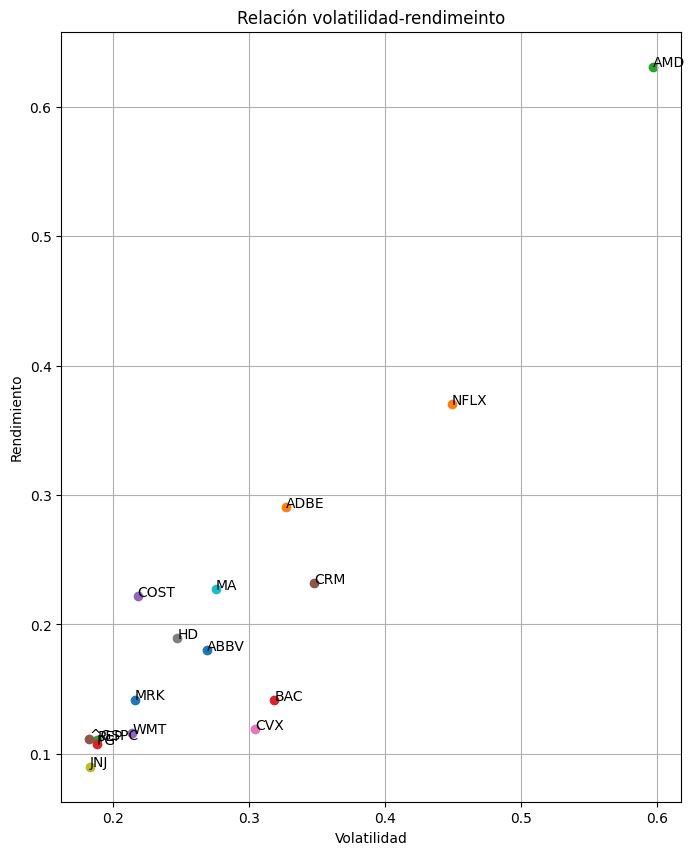

In [11]:
df = pd.DataFrame({
    "vol": volatilidad_anual,
    "rend": rendimiento_anual

})

plt.figure(figsize=(8,10))

for i in range(len(df)):
    flag_df = df.iloc[i]
    name = df.index[i]
    plt.scatter(flag_df["vol"], flag_df["rend"])
    plt.text(flag_df["vol"], flag_df["rend"], name)
plt.grid()
plt.title("Relación volatilidad-rendimeinto")
plt.xlabel("Volatilidad")
plt.ylabel("Rendimiento")

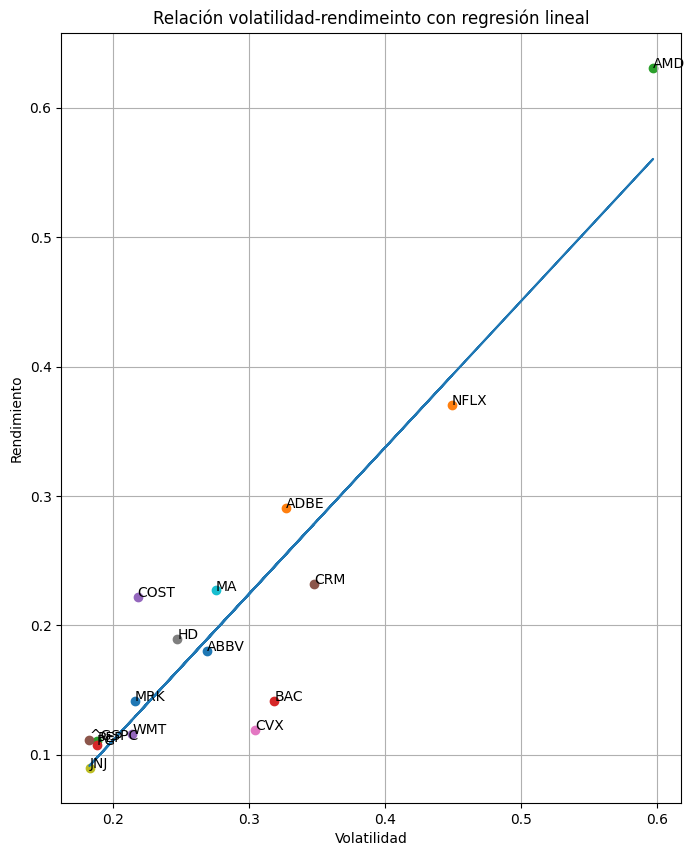

In [12]:
X = df[["vol"]]
y = df[["rend"]]

model = LinearRegression().fit(X, y)

df["predicciones"] = model.predict(X)

plt.figure(figsize=(8,10))

for i in range(len(df)):
    flag_df = df.iloc[i]
    name = df.index[i]
    plt.scatter(flag_df["vol"], flag_df["rend"])
    plt.text(flag_df["vol"], flag_df["rend"], name)
plt.grid()
plt.title("Relación volatilidad-rendimeinto con regresión lineal")
plt.xlabel("Volatilidad")
plt.ylabel("Rendimiento")
plt.plot(df.vol, df.predicciones)

In [13]:
print("La ecuación de la recta es: " + str(model.intercept_[0]) + " + " + str(model.coef_[0][0]) + " * Volatilidad")

La ecuación de la recta es: -0.11516656792884228 + 1.1318744855889216 * Volatilidad


En este gráfico podemos ver la relacion entre volatilidad y rendimiento de 15 acciones del S&P 500, y del propio índice. Con base en los datos individuales de volatilidad y rendimiento, se calcula una recta que representa el rendimiento del portafolio con base en la volatilidad de sus componentes.

Dado que el intercepto de la recta es en $y = -0.1152$ quiere decir que al asumir una posición con 0% de volatilidad se espera un rendimiento del -11.52%. El coeficiente de la función es de $1.1319x$. Este depende de la volatilidad del portafolio, donde tiene una repercusión en el rendimiento de manera proporcional. Por cada punto porcentual que se asuma de volatilidad, se espera un retorno del 13% mayor, de manera proporcional. Mientras más volatilidad se este dispuesto a asumir, mayor será el rendimiento esperado.